In [162]:
import nltk
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gmLDA
pyLDAvis.enable_notebook()

from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [315]:
data = pd.read_csv('Resume.csv')
category = data.Category.unique()
category

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [164]:
category[1]

'DESIGNER'

In [165]:
data = data[['Resume_str','Category']]
data.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [166]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['Resume_str'] = data.Resume_str.map(alphanumeric).map(punc_lower).replace('\n', ' ')
data.head()

,Resume_str,Category
0,hr administrator marketing associate\...,HR
1,hr specialist us hr operations ...,HR
2,hr director summary over ...,HR
3,hr specialist summary dedica...,HR
4,hr manager skill highlights ...,HR


In [167]:
X = data.Resume_str
y = data.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [168]:
X[0]

'         hr administrator marketing associate\n\nhr administrator       summary     dedicated customer service manager with    years of experience in hospitality and customer service management    respected builder and leader of customer focused teams  strives to instill a shared  enthusiastic commitment to customer service          highlights         focused on customer satisfaction  team management  marketing savvy  conflict resolution techniques     training and development  skilled multi tasker  client relations specialist           accomplishments      missouri dot supervisor training certification  certified by ihg in customer loyalty and marketing by segment   hilton worldwide general manager training certification  accomplished trainer for cross server hospitality systems such as    hilton onq      micros    opera pms     fidelio    opera    reservation system  ors      holidex    completed courses and seminars in customer service  sales strategies  inventory control  loss pre

In [169]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(X)
print(dtm_tf.shape)

(2484, 7084)


In [310]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=15, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [311]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.121752  0.043782       1        1  11.394120
9      0.045028 -0.023175       2        1   9.873048
6     -0.103520 -0.128455       3        1   9.514059
10    -0.004794  0.137729       4        1   8.934017
4      0.002077  0.107281       5        1   7.956738
0      0.013706 -0.156254       6        1   7.890517
2      0.121497 -0.024576       7        1   7.031424
7      0.109380 -0.034705       8        1   6.883222
1      0.096978  0.064692       9        1   5.930742
5     -0.163249  0.146455      10        1   5.842441
11     0.109108 -0.020173      11        1   5.027225
14    -0.021795 -0.083102      12        1   4.604691
8      0.016331  0.072387      13        1   3.664198
13    -0.250139 -0.086421      14        1   3.255601
3      0.151145 -0.015464      15        1   2.197958, topic_info=            Term         Freq        Total Category  logprob  loglift
4970     project  5304.000000  5304.000000  Default  30.0000  30.0000
3895   marketing  4529.000000  4529.000000  Default  29.0000  29.0000
1838      design  3356.000000  3356.000000  Default  28.0000  28.0000
2677        food  2017.000000  2017.000000  Default  27.0000  27.0000
2607   financial  4165.000000  4165.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
492     assisted    74.228193  1812.832388  Topic15  -5.8129   0.6221
6273  supervisor    69.751723   895.585759  Topic15  -5.8751   1.2651
488       assist    70.507852  1311.241826  Topic15  -5.8643   0.8946
94    activities    71.164284  2086.579385  Topic15  -5.8551   0.4394
2835     general    69.694074  1841.159610  Topic15  -5.8759   0.5436

[1108 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
15        2  0.026097  academic
15        3  0.010439  academic
15        4  0.791614  academic
15        5  0.019138  academic
15        6  0.031317  academic
...     ...       ...       ...
7074      9  0.055566     youth
7074     10  0.106858     youth
7074     13  0.021372     youth
7076      1  0.942273       yoy
7083      4  0.958214      zoos

[5823 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 10, 7, 11, 5, 1, 3, 8, 2, 6, 12, 15, 9, 14, 4])

In [306]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(X)
print(dtm_tfidf.shape)

(2484, 7084)


In [ ]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tfidf, tfidf_vectorizer, )

In [307]:
nmf = NMF(n_components=19).fit(dtm_tfidf)
topics_dict = {}
for topic_idx, topic in enumerate(nmf.components_):
    topics_dict[topic_idx] = [tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]

In [308]:
topics_to_df = pd.DataFrame(topics_dict)

In [309]:
topics_to_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,client,accounting,customers,network,food,students,construction,employee,patient,media,loan,aviation,fitness,sql,design,financial,engineering,marketing,administrative
1,strategic,accounts,store,windows,chef,teacher,project,human,care,public,banking,aircraft,exercise,data,designer,finance,manufacturing,digital,mail
2,market,tax,merchandise,hardware,kitchen,student,projects,benefits,patients,relations,mortgage,maintenance,wellness,project,graphic,analysis,mechanical,content,assistant
3,account,accountant,cash,server,culinary,classroom,site,resources,medical,press,credit,equipment,health,application,art,reporting,engineer,brand,calls
4,revenue,ledger,inventory,security,menu,learning,safety,employees,health,social,bank,safety,personal,oracle,interior,budget,production,campaigns,filing
5,territory,payroll,product,technology,restaurant,school,contractor,recruitment,nursing,communications,branch,repair,trainer,database,adobe,accounting,design,advertising,microsoft
6,accounts,financial,items,software,cooking,children,contractors,payroll,clinical,events,loans,flight,instructor,testing,designs,audit,electrical,strategy,reports
7,product,payable,merchandising,systems,catering,teaching,building,recruiting,nurse,event,lending,systems,nutrition,software,illustrator,cost,quality,product,billing
8,relationships,reconciliations,cashier,servers,sanitation,parents,concrete,compensation,healthcare,content,commercial,navy,group,web,creative,forecasting,control,market,telephone
9,clients,statements,orders,cisco,menus,curriculum,subcontractors,policies,hospital,releases,financial,personnel,programs,server,photoshop,annual,equipment,media,data


In [300]:
topic_by_index = ['']
category

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [294]:
topics_matrix = nmf.transform(dtm_tfidf)

In [289]:
num = 23
indices = np.argsort(topics_matrix[:,num])
top_indices = indices[len(indices):len(indices)-num-1:-1]
for idx in range(len(top_indices)):
    print(topics_matrix[idx,num])
    print(data.Resume_str.iloc[indices[idx]].strip()[0:50])
    print("---------------------------------------", '\n')

0.0
hr administrator marketing associate

hr administr
--------------------------------------- 

0.01607570901514943
chef       executive profile    accomplished perso
--------------------------------------- 

0.0
rm     roxanne    mejia       summary     motivati
--------------------------------------- 

0.10441879470466271
chef           summary     customer oriented fast 
--------------------------------------- 

0.0
chef       career focus     i am a nursing student
--------------------------------------- 

0.14601722363538286
senior architect   mdm           professional prof
--------------------------------------- 

0.025095348793336386
senior special investigator           summary     
--------------------------------------- 

0.006529482137819875
services engineer           summary    seeking a c
--------------------------------------- 

0.0
it manager       summary     it product manager br
--------------------------------------- 

0.057463321566321356
highlights          prog

In [ ]:
category = []

In [251]:
threshold = 0.02
_idx = np.amax(topics_matrix, axis=1) > threshold  # idx of doc that above the threshold
topics_matrix_filtered = topics_matrix[_idx]

In [252]:
topics_matrix_std = StandardScaler().fit_transform(topics_matrix_filtered)

In [253]:
tsne = TSNE(n_components=2, verbose=1, random_state=0, angle=.6, init='pca')
topics_mapped_2d = tsne.fit_transform(topics_matrix_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2483 samples in 0.004s...
[t-SNE] Computed neighbors for 2483 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2483
[t-SNE] Computed conditional probabilities for sample 2000 / 2483
[t-SNE] Computed conditional probabilities for sample 2483 / 2483
[t-SNE] Mean sigma: 0.569336
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.861778
[t-SNE] KL divergence after 1000 iterations: 0.914630


In [254]:
max_topic_per_post = []
for i in range(topics_matrix_filtered.shape[0]):
    max_topic_per_post += topics_matrix_filtered[i].argmax(),

In [255]:
max_topic_per_post_df = []
for i in range(topics_matrix.shape[0]):
    max_topic_per_post_df += topics_matrix[i].argmax(),

In [256]:
max_topic_per_post = [[x] for x in max_topic_per_post]
tsne_data = np.concatenate((topics_mapped_2d, max_topic_per_post), 1)

In [320]:
def cluster_plot(tsne_data):
    color_map = {0:  '#00FFFF', 1:  '#7FFFD4', 2:  '#838B8B', 3:  '#E3CF57', 4:  '#8A2BE2', 5:  '#FF4040',
                 6:  '#CDAA7D', 7:  '#FF6103', 8:  '#6495ED', 9:  '#DC143C', 10:  '#8FBC8F', 11:  '#030303',
                 12:  '#4B0082', 13:  '#191970', 14:  '#808000', 15:  '#4EEE94', 16:  '#EE3A8C', 17:  '#D8BFD8',
                 18:  '#8B4726', 19:  '#808069', 20: '#002300', 21: '#800000', 22: '#B0C4DE', 23: 'F08080'}

    labels = list(range(num))

    plt.figure(figsize=(15, 10))
    for topic in range(num):
        inds = np.where(tsne_data[:, 2] == topic)[0]
        plt.scatter(x=tsne_data[inds, 0],
                    y=tsne_data[inds, 1],
                    marker='o',
                    s=10,
                    color=color_map[topic],
                    label=topic)

    plt.xlabel('t-SNE Component 1', fontsize=12)
    plt.ylabel('t-SNE Component 2', fontsize=12)
    plt.title('Topics in 2-D Space', fontsize=14)
    lgnd = plt.legend(loc="lower right", fontsize=12)
    plt.show()

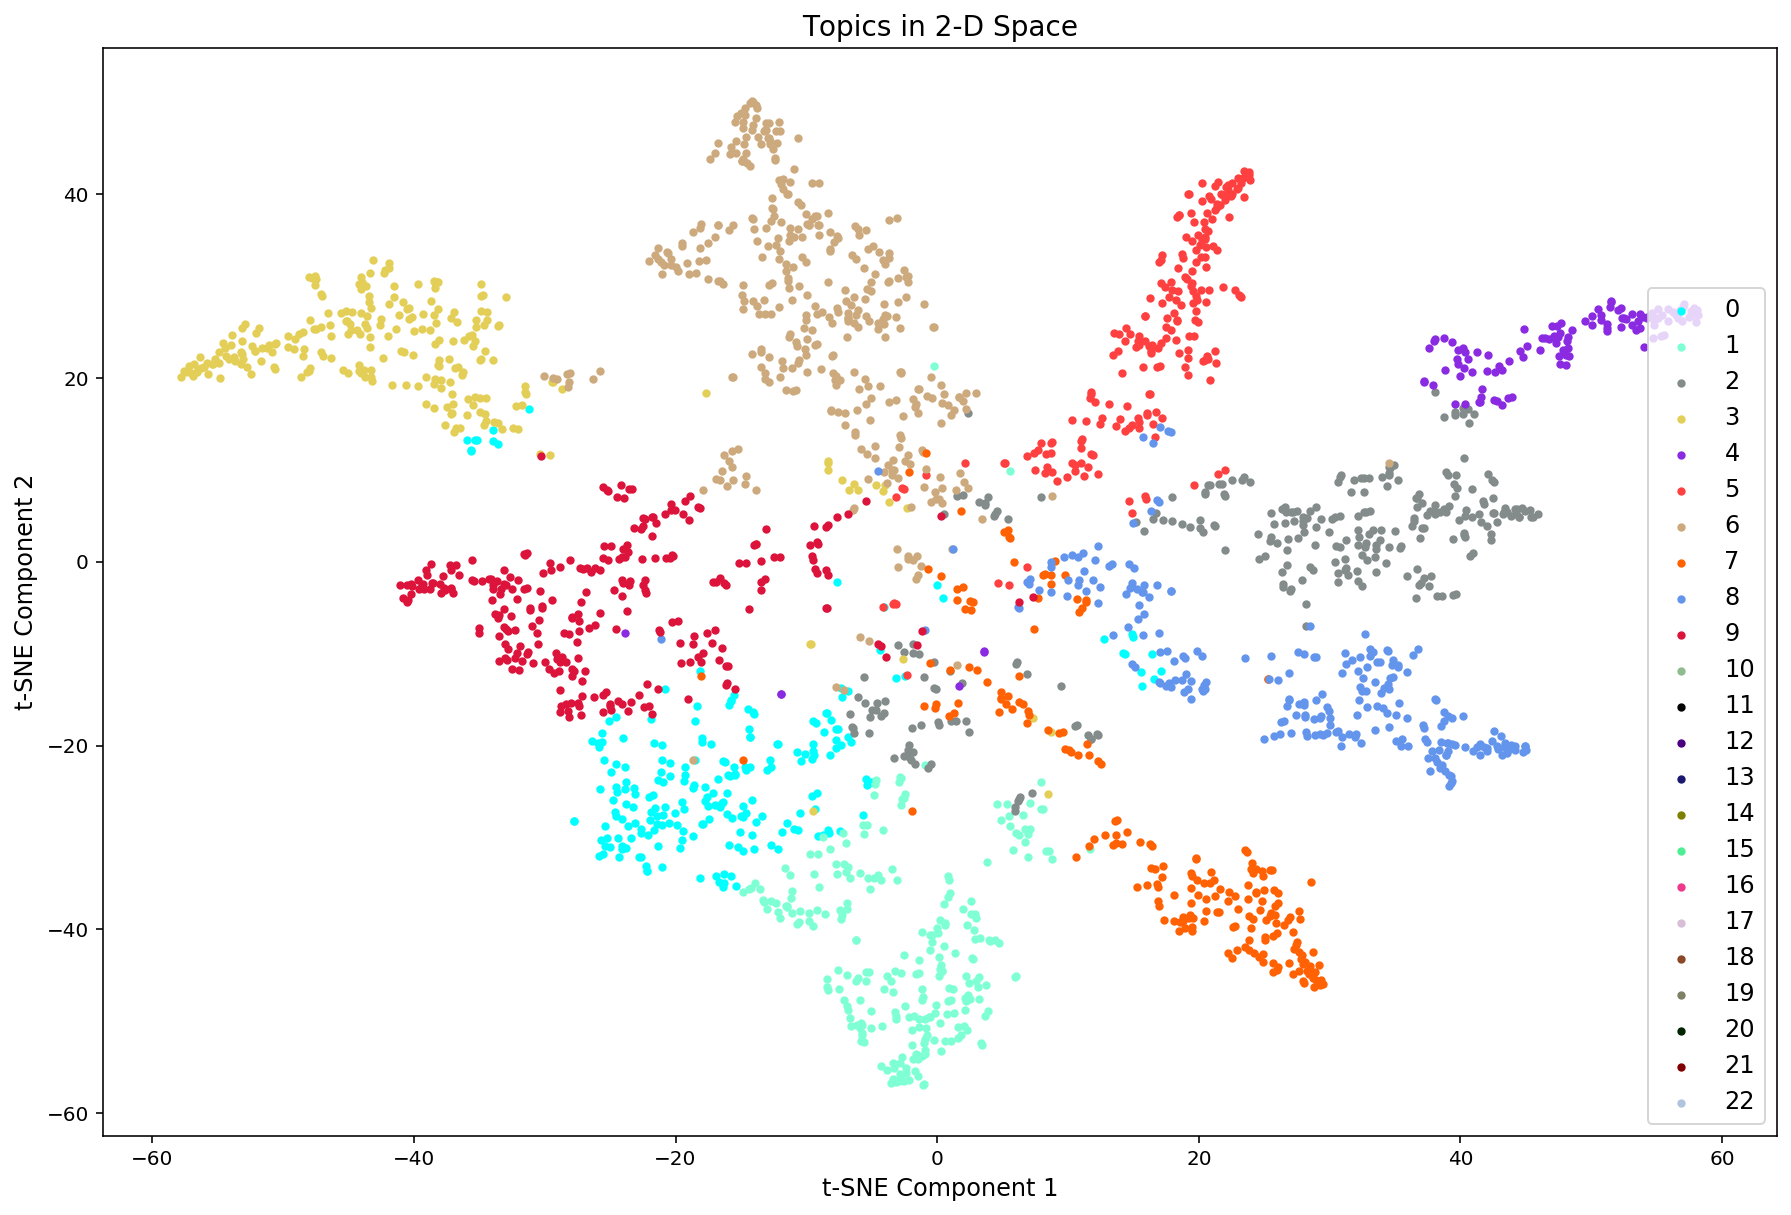

In [321]:
cluster_plot(tsne_data)

In [259]:
from sklearn.cluster import KMeans

In [260]:
kmeans = KMeans(n_clusters=num).fit_predict(topics_matrix_filtered)

In [261]:
kmeans_topic_per_post = [[x] for x in kmeans]
kmeans_tsne_data = np.concatenate((topics_mapped_2d, kmeans_topic_per_post), 1)

In [262]:
data['topic'] = max_topic_per_post_df

In [263]:
data.shape

(2484, 3)

In [264]:
data.head()

,Resume_str,Category,topic
0,hr administrator marketing associate\...,HR,7
1,hr specialist us hr operations ...,HR,9
2,hr director summary over ...,HR,7
3,hr specialist summary dedica...,HR,2
4,hr manager skill highlights ...,HR,7


In [265]:
topic_bar = data.topic.value_counts().reset_index().rename(columns={'index':'Topic', 'topic':'Count'}).sort_values('Count', ascending=False)

In [266]:
topic_bar

,Topic,Count
0,6,390
1,2,288
2,9,279
3,1,256
4,3,252
5,8,240
6,0,228
7,5,215
8,7,214
9,4,122


In [267]:
topic_bar.Topic=topic_bar.Topic.apply(lambda x: category[x])

In [268]:
topic_bar

,Topic,Count
0,HEALTHCARE,390
1,INFORMATION-TECHNOLOGY,288
2,BPO,279
3,DESIGNER,256
4,TEACHER,252
5,AGRICULTURE,240
6,HR,228
7,BUSINESS-DEVELOPMENT,215
8,FITNESS,214
9,ADVOCATE,122


Text(0, 0.5, 'Topic')

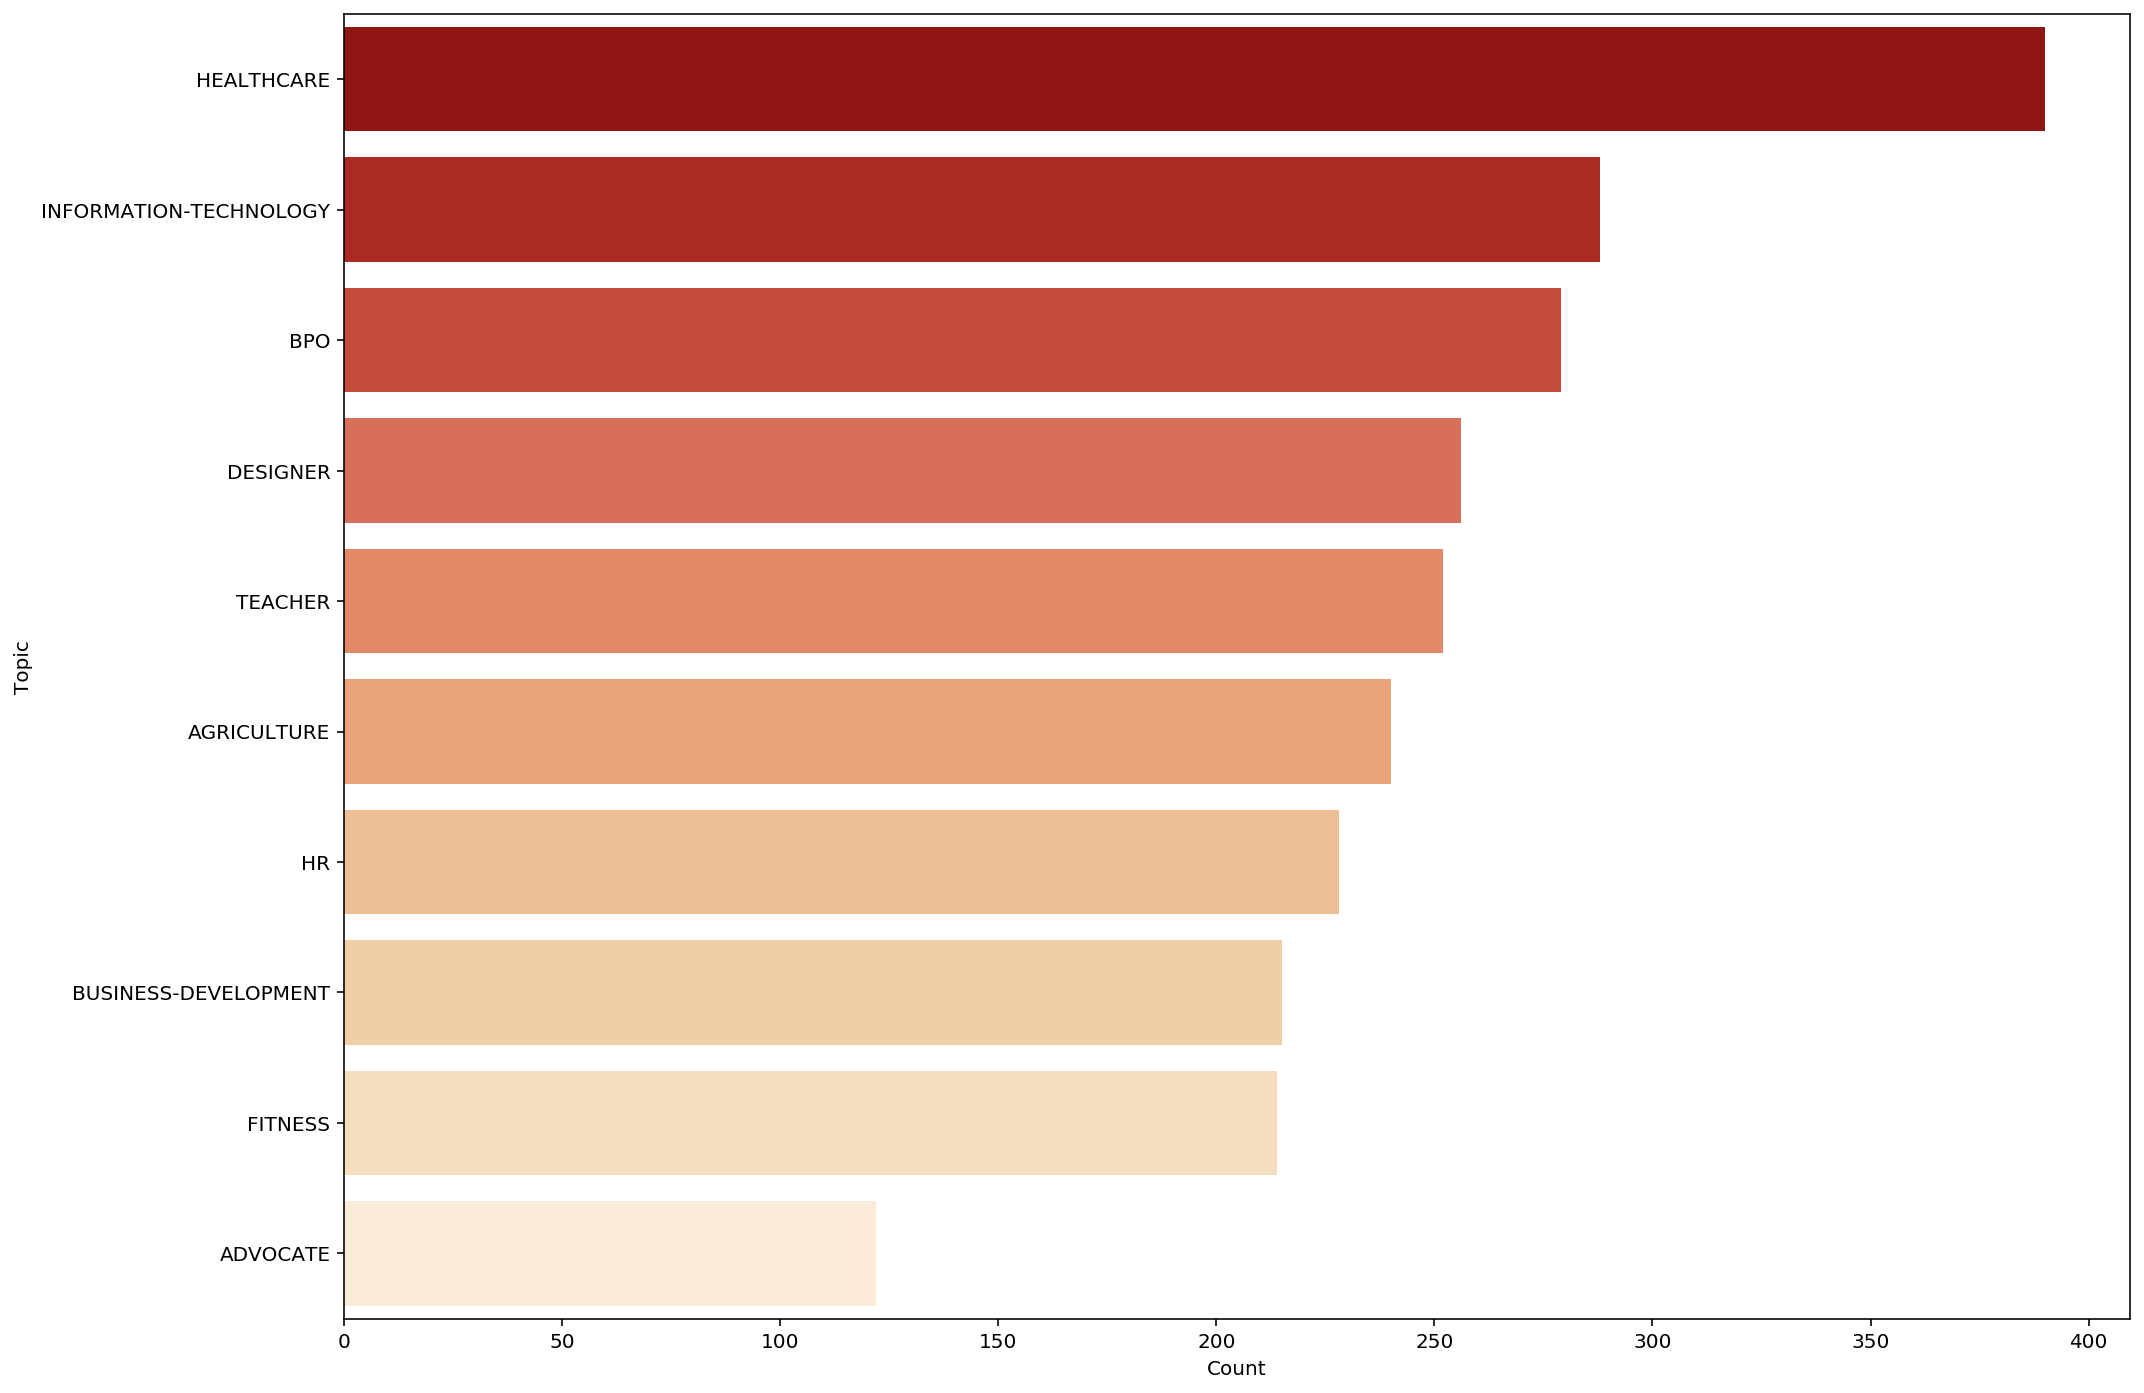

In [269]:
plt.figure(figsize=(16,12))
topicbarchart = sns.barplot(data=topic_bar, x='Count', y='Topic', palette="OrRd_r")
topicbarchart.set_xlabel('Count')
topicbarchart.set_ylabel('Topic')